#Imporrt Libraries

In [0]:
import pandas as pd #untuk membaca dan menulis spreadsheet
import numpy as np #untuk melakukan perhitungan yang efisien
import matplotlib.pyplot as plt #untuk visualisasi data
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd/content/drive/My Drive/Colab Notebooks/dgts sintia norma

/content/drive/My Drive/Colab Notebooks/dgts sintia norma


In [4]:
ls

'1408_Good People_Final Project.ipynb'  'Kelommpok 15.ipynb'
'Clustering kelompok 15.ipynb'           student-por.csv


#Menginputkan data

In [5]:
student = pd.read_csv("student-por.csv", sep=';')
student.head(658)  

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


#Menghilangkan kolom yang tidak perlu

In [6]:
# Menghilangkan Kolom Yang Tidak Perlu
new_student = student.drop(["sex","address", "famsize","Pstatus","Medu","Fedu","Fjob","reason","guardian","traveltime","studytime","failures"
                     ,"schoolsup","famsup","paid","activities","nursery","higher","internet","romantic","famrel","freetime","goout","Dalc","Walc","health"
                     ,"absences","Mjob","G3"], axis = 1)
new_student.head(600)

,school,age,G1,G2
0,GP,18,0,11
1,GP,17,9,11
2,GP,15,12,13
3,GP,15,14,14
4,GP,16,11,13
...,...,...,...,...
595,MS,18,17,17
596,MS,17,17,18
597,MS,18,9,0
598,MS,18,10,11


In [7]:
#Menentukan variabel yang akan di klusterkan, variabel G1 pada sumbu x dan variabel G2 pada sumbu y
student_x = new_student.iloc[:, 2:4]
student_x.head(600)

,G1,G2
0,0,11
1,9,11
2,12,13
3,14,14
4,11,13
...,...,...
595,17,17
596,17,18
597,9,0
598,10,11


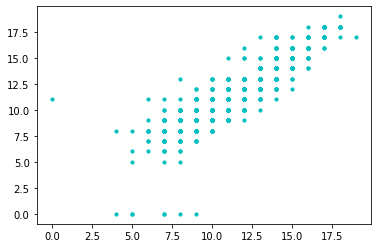

In [8]:
#Memvisualkan persebaran data ---
plt.scatter(new_student.G1, new_student.G2, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [9]:
#Mengubah Variabel Data Frame Menjadi Array ---
x_array =  np.array(student_x)
print(x_array)

[[ 0 11]
 [ 9 11]
 [12 13]
 ...
 [11 12]
 [10 10]
 [10 11]]


In [10]:
#Menstandarkan Ukuran Variabel --- AGAR DATA KEMBALI SEPERTI JENIS DATA DI AWAL SEBELUM DI ARRAY KAN
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.        , 0.57894737],
       [0.47368421, 0.57894737],
       [0.63157895, 0.68421053],
       ...,
       [0.57894737, 0.63157895],
       [0.52631579, 0.52631579],
       [0.52631579, 0.57894737]])

In [11]:
#Menentukan dan mengkonfigurasi fungsi kmeans ---
kmeans = KMeans(n_clusters = 2, random_state=123)
# Menentukan kluster dari data ---
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [12]:
#Menampilkan pusat cluster/centroid ---
print(kmeans.cluster_centers_)

[[0.72874494 0.73905042]
 [0.4984776  0.50645208]]


In [13]:
#Menampilkan Hasil Kluster ---
print(kmeans.labels_)
#Menambahkan Kolom "kluster" Dalam Data Frame Driver ---
new_student["kluster"] = kmeans.labels_

[1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0
 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0
 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1
 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

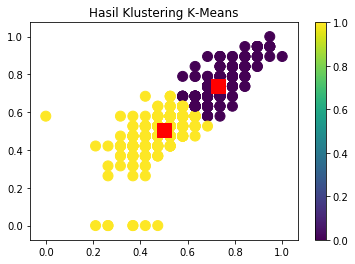

In [14]:
#Memvisualkan hasil kluster ---
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = new_student.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()